In [63]:
import numpy as np
import pandas as pd  
import random as rnd
import math
from tqdm import tqdm_notebook
from sklearn.metrics import make_scorer, r2_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate, KFold

from IPython.display import display, HTML

%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
# paths with datasets

paths = [
    "./proj_o.csv"
]

for num in range(1,11) :
    name = "isomap_o_dim" + str(num) + ".csv"
    paths.append(name)

In [33]:
datasets = [np.genfromtxt(path, delimiter=';') for path in paths]
datasets[1] = datasets[1].reshape(-1,1) # for 1-dim isomap

In [34]:
orig_data = datasets[0]
isomap_data_list = datasets[1:]

In [64]:
def mae_score(y, y_pred):
    return np.linalg.norm(y_pred - y, axis=1, ord=1).mean() / np.linalg.norm(y, axis=1, ord=1).mean()

scorer_mae = make_scorer(mae_score, greater_is_better=False)

knn = KNeighborsRegressor(n_neighbors=4, leaf_size=30, p=2, weights='distance')
knn = LGBMRegressor()
mo_knn = MultiOutputRegressor(knn)

In [65]:
dims = []
errs = []
for isomap_data in tqdm_notebook(isomap_data_list):
    dims.append(isomap_data.shape[1])
    errs.append(-cross_val_score(mo_knn, isomap_data, orig_data, scoring=scorer_mae, cv=5, n_jobs=-1).mean())
    

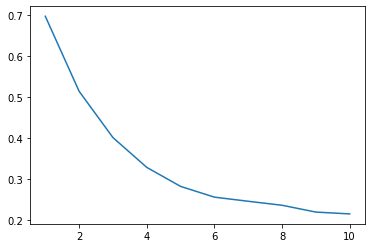

In [66]:
plt.plot(dims, errs)

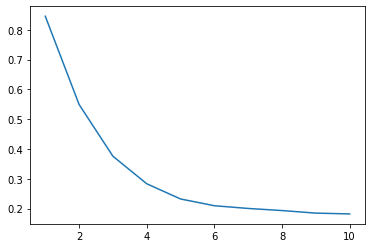

In [54]:
plt.plot(dims, errs)

In [67]:
errs_AGP_g = []
data_AGP_g = np.genfromtxt("./separate_datasets_data/AGP_proj_g.csv", delimiter=';')
for n in tqdm_notebook(dims):
    transformer = Isomap(n_components=n)
    dataset_transformed = transformer.fit_transform(data_AGP_g)
    errs_AGP_g.append(-cross_val_score(mo_knn, dataset_transformed, data_AGP_g, scoring=scorer_mae, cv=5, n_jobs=-1).mean())
    

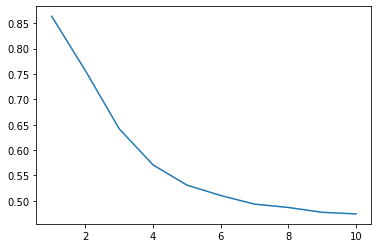

In [68]:
plt.plot(dims, errs_AGP_g)

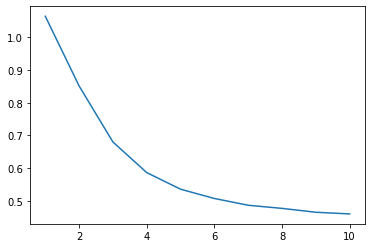

In [60]:
plt.plot(dims, errs_AGP_g)